In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df= pd.read_csv("heart_disease_uci.csv")

In [49]:
df = df.dropna()
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [50]:
df['fbs'] = (df['fbs'] == 'True').astype(int)
df['exang'] = (df['exang'] == 'True').astype(int)

df['sex'] = (df['sex'] == 'Male').astype(int)
le = LabelEncoder()

df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

df['target'] = (df['num'] > 0).astype(int)
df = df.drop('num', axis=1)

if 'dataset' in df.columns:
    df = df.drop('dataset', axis=1)

In [51]:
X = df.drop(['target', 'ca', 'thal', 'id', 'exang'], axis=1)
y = df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope
0,63,1,3,145.0,233.0,0,0,150.0,2.3,0
1,67,1,0,160.0,286.0,0,0,108.0,1.5,1
2,67,1,0,120.0,229.0,0,0,129.0,2.6,1
3,37,1,2,130.0,250.0,0,1,187.0,3.5,0
4,41,0,1,130.0,204.0,0,0,172.0,1.4,2


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [53]:
from sklearn.model_selection import KFold, cross_val_score

In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [55]:
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X, y, cv=kf, scoring='r2')

In [56]:
import numpy as np 

r2 = np.mean(scores) 
r2

np.float64(0.11697478991596633)

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features (first 5 rows):")
print(X_scaled_df.head())

#Train-Test Split and Model Training
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Scaled Features (first 5 rows):
        age       sex        cp  trestbps      chol  fbs   restecg    thalch  \
0  0.940446  0.687682  1.987204  0.749760 -0.262867  0.0 -0.999250  0.029124   
1  1.384143  0.687682 -0.920662  1.596354  0.747722  0.0 -0.999250 -1.790447   
2  1.384143  0.687682 -0.920662 -0.661231 -0.339138  0.0 -0.999250 -0.880662   
3 -1.943588  0.687682  1.017915 -0.096835  0.061285  0.0  0.903781  1.632079   
4 -1.499891 -1.454161  0.048627 -0.096835 -0.815830  0.0 -0.999250  0.982232   

    oldpeak     slope  
0  1.069475 -2.264299  
1  0.380309 -0.640737  
2  1.327912 -0.640737  
3  2.103224 -2.264299  
4  0.294163  0.982825  


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y=y[:75]
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
#auc = roc_auc_score(y, probas[:, 1])
accuracy

0.4666666666666667

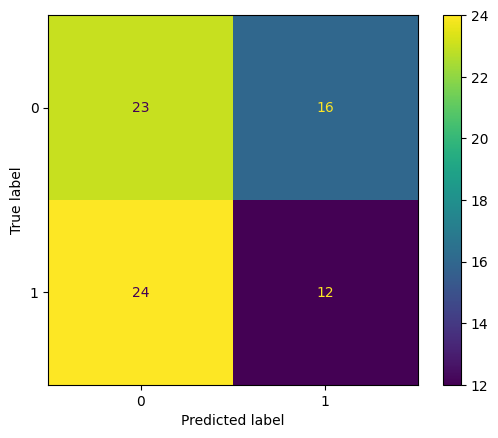

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()